# Środowisko pracy

Na zajęciach będziemy korzystać z języka Python w wersji 3.10 (lub nowszej) oraz zestawu konkretnych pakietów. Na własną odpowiedzialność można korzystać z innych wersji Pythona. Poprzednie wersje Pythona (w szczególności 2.x) nie są zalecane i mogą nie być kompatybilne z notebookami! Zalecamy korzystanie z Linuxa lub MacOSa, nie testowaliśmy notebooków na Windowsie.

## Lokalnie

1. Ściągnąć repozytorium przedmiotu: 
    ```
    git clone https://github.com/gmum/ml2024-25
    ```  
2. Ściągnąć oraz zainstalować minicondę: https://conda.io/en/latest/miniconda.html (niewymagane jeśli zainstalowana jest `Anaconda`)  
Na windowsie: uruchomić `Anaconda Prompt`
3. Stworzyć środowisko razem z wymaganymi paczkami:  
    ```
    conda create --name ml python=3.10 numpy=1.22.2 scipy=1.11.1 matplotlib=3.7.2 scikit-learn=1.2.0 jupyter
    ```
4. Aktywować środowisko:
Unix/MacOS: `conda activate ml`  
Windows: w `Anaconda Prompt`: `activate ml`
5.  Doinstalować PyTorcha: https://pytorch.org/  (2.0.1)
 * GPU: `conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia`
 * CPU only: `conda install pytorch torchvision torchaudio cpuonly -c pytorch`
6. W folderze repo odpalić serwer jupytera: `jupyter lab`
7. Sprawdzić w przeglądarce czy wszystko działa
8. Zachęcamy do używania edytorów notebooków zintegrowanych z IDE, np. PyCharm lub VSCode.

(dla użytkowników Dockera) można skorzystać z `nvcr.io/nvidia/pytorch:23.08-py3`


## Zmiana git remote

1. Po ściąganiu remote jest podpięty pod wspólne repo. Sprawdzamy to poleceniem `git remote -v`:

    ```
    origin  https://github.com/gmum/ml2024-25.git (fetch)
    origin  https://github.com/gmum/ml2024-25.git (push)
    ```

2. Tworzymy własne repozytorium na github

3. Zmieniamy push repo
   ```
   git remote set-url --push origin <YOUR REPO LINK>
   ```
4. Sprawdzamy zmiany poleceniem `git remote -v`
    ```
    origin  https://github.com/gmum/ml2024-25.git (fetch)
    origin  <YOUR REPO LINK> (push)
    ```


In [2]:
### Test środowiska

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import torch

In [3]:
### Test PyTorch GPU

In [4]:
t = torch.tensor([1,2,3])
t.cuda() # nie mam gpu

AssertionError: Torch not compiled with CUDA enabled

## Colaboratory (opcjonalnie)
W przyszłości do notebooków mogą być potrzebne większe zasoby obliczeniowe. W tym celu będziemy korzystać z narzędzia [Google Colaboratory](https://colab.research.google.com/), które udostępnia za darmo dostęp do GPU. Opcjonalnie można teraz przetestować jego działanie:

1. Wrzucić folder z repo na swojego Google Drive.

2. Otworzyć ten plik i z dostępnych aplikacji wybrać `Colaboratory`

3. Sprawdzić powyższą komórką czy wszystko działa.

# Wstęp do pakietów naukowych: NumPy

Na początek polecam zaznajomić się z podstawami NumPy, polecany tutorial na kompletny wstęp: https://numpy.org/devdocs/user/absolute_beginners.html
Dodatkowo z kolejnej części https://numpy.org/devdocs/user/basics.html warto zaznajomić się z: Data types, Array creation, Indexing, Broadcasting.

Rada ogólna: nie bać się "googlowania" i czytania dokumentacji.

**Kolejne zajęcia będą zakładać znajomość podstaw korzystania z numpy. Dla osób, które nie potrafią samodzielnie wykonać poniższych ćwiczeń, przetworzenie materiału z powyższych poradników jest obowiązkowe.**

## Zadanie 1. 
Używając funkcji [`np.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) wylosować dwie macierze **różnych** rozmiarów, i następnie przenożyć je przez siebie macierzowo tak aby otrzymać macierz rozmiaru `9x6`.

In [10]:
#a 9 X
#b X 6
A = np.random.normal(size=(9, 3))
B = np.random.normal(size=(3, 6))

C: np.ndarray = np.dot(A, B)

print([m.shape for m in [A, B, C]])

assert A.shape != B.shape
assert C.shape == (9, 6)

[(9, 3), (3, 6), (9, 6)]


## Zadanie 2.

Zaimplementować funkcję $\sigma$, która przyjmuje macierz numpy $X$ (**uwaga**: nie mylić z `np.matrix`!) i zwraca macierz tego samego rozmiaru z wartościami funkcji:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
odpowiednio dla każdego $x$.

Hint: [`np.e`](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.e)

In [12]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    #exp to e
    return 1 / (1 + np.exp(-x))


X = np.random.uniform(low=-10, high=10, size=(1000, 2000))

assert sigmoid(X).max() <= 1.0
assert sigmoid(X).min() >= 0.0

In [13]:
%%timeit n=10
sigmoid(X)

30.6 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Zadanie 3.
Ustandaryzować wartości w macierzy $X$ per kolumna, tzn. dla każdej wartości $x$ w kolumnie wykonać:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

gdzie $\mu_j$ to średnia wartość kolumny $j$, a $\sigma_j$ to odchylenie standardowe kolumny $j$.

In [16]:
X = np.random.uniform(low=-10, high=10, size=(100, 10))

mu = X.mean(axis=0) 
sigma = X.std(axis=0)

X_hat: np.ndarray = (X - mu) / sigma

assert np.allclose(X_hat.mean(0), 0.0)
assert np.allclose(X_hat.std(0), 1.0)

## Zadanie 4. 

Dla funkcji $\sigma$ z Zadania 2, narysować jej wykres dla argumentów z zakresu $(-10, 10)$. Użyjemy do tego funkcji `plot` z biblioteki [matplotlib](https://matplotlib.org/).

Narysowany wykres powinien przypominać poniższy:

![sigmoid](https://raw.githubusercontent.com/gmum/ml2024-25/main/lab/resources/sigmoid.png)

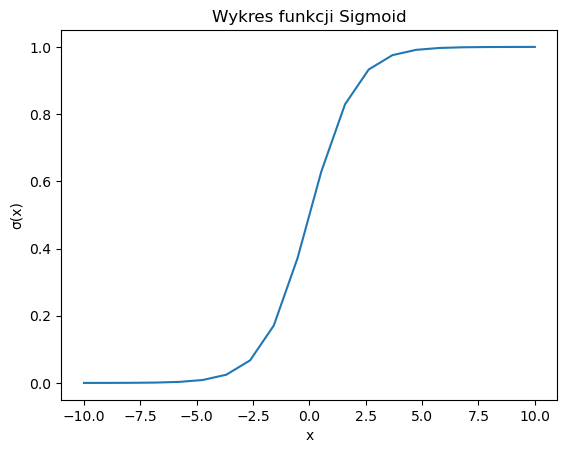

In [22]:
X = np.linspace(-10, 10, 20)

Y = sigmoid(X)

plt.plot(X, Y)

plt.title("Wykres funkcji Sigmoid")
plt.xlabel("x")
plt.ylabel("σ(x)")

plt.show()